In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot 

In C:\Users\physi\Anaconda4\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\physi\Anaconda4\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\physi\Anaconda4\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\physi\Anaconda4\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\physi\Anaconda4\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


# Problem 1  
**[10 pts] Download the labeled dataset, if you like use a dummy email address for registration. There must be 8 data files, each representing a particular cyber-attack type and it's day, and it's collected pcap data.**  


# Problem 2  
**[10 pts] Pick one of the data files, call it Dataset 1, and examine its features. Make sure it has more than one class value for its label.**  


In [2]:
Dataset1 = pd.read_csv("C:/Users/physi/Desktop/AppliedMachineLearning_EN.705.601/Mod10/GeneratedLabelledFlows/ThursdayMorning.csv",encoding='cp1252',low_memory=False )

In [3]:
# Dataset1.info()

# Problem 3  
**[10 pts] For the Dataset 1, pick a machine learning methodology and justify your choice.**  
For these datasets I will use classification to detect network attacks by training on a a large subset of data or through the use of 10 fold cross validation. The model will then be used on the other datasets after first accounting for new predictive features in each dataset. 

In [5]:
# check for unique items

# for col in Dataset1.columns:
#     if Dataset1[col].dtype == np.object:
#         print(col, Dataset1[col].unique())

In [6]:
Dataset1 =Dataset1.drop(['Flow ID'], axis =1)
Dataset1 =Dataset1.drop([' Source IP'], axis =1)
Dataset1 =Dataset1.drop([' Destination IP'], axis =1) 
Dataset1 =Dataset1.drop([' Timestamp'], axis =1) 
Dataset1 =Dataset1.drop(['Flow Bytes/s'], axis =1) 
Dataset1 =Dataset1.drop([' Flow Packets/s'], axis =1)

# Problem 4  
**[10 pts] Process the class feature/category as binary classes for supervised learning, assign BENIGN to value 0 and the rest to value 1. Check its balance for the Dataset 1.**  


In [7]:
# map the labels feature for clasification 
attacks = {'BENIGN':0, 'Web Attack – Brute Force':1, 'Web Attack – XSS':1,
 'Web Attack – Sql Injection':1}
Dataset1[' Label'] = Dataset1[' Label'].map(attacks)

# Problem 5  
**[10 pts] Explore Dataset 1 features with respect to the class. (Hint: features Source Port and Destination Port are very useful, research and find out important networking port numbers and one-hot-encode them. Unimportant port numbers or source port numbers can be assigned to a feature called 'other ports')**  


In [8]:
# Dataset1[' Source port']= Dataset1[' Source Port'].astype('int32')

In [9]:
# make all non interesting ports -10 for both Source and Destination port

for i in range(2):
    for j in range(170366):
        if Dataset1.iloc[j,i] not in (20, 21, 22, 23, 25, 53, 80, 110, 119, 123, 143, 161, 194, 443):
            Dataset1.iloc[j,i] = -10

In [10]:
Dataset1= Dataset1.drop(Dataset1.columns.difference([' Source Port',' Destination Port', ' min_seg_size_forward', ' Init_Win_bytes_backward', ' Init_Win_bytes_forward', ' Down/Up Ratio', ' Label' ]), 1)

# Problem 6  
**[10 pts] Display some histograms and anything you deem fit to pick independent Dataset 1 features. (Hint: source/destination bytes, packets, ports and the duration features)**  



In [11]:
Dataset1.corr()

,Source Port,Destination Port,Down/Up Ratio,Init_Win_bytes_backward,min_seg_size_forward,Label
Source Port,1.000000,-0.316274,-0.187558,0.092782,-0.014838,-0.045503
Destination Port,-0.316274,1.000000,-0.287812,0.034583,-0.062896,-0.032914
Down/Up Ratio,-0.187558,-0.287812,1.000000,-0.114341,0.124837,-0.124441
Init_Win_bytes_backward,0.092782,0.034583,-0.114341,1.000000,-0.026618,0.258545
min_seg_size_forward,-0.014838,-0.062896,0.124837,-0.026618,1.000000,0.114952
Label,-0.045503,-0.032914,-0.124441,0.258545,0.114952,1.000000


In [12]:
Dataset1.head()

,Source Port,Destination Port,Down/Up Ratio,Init_Win_bytes_backward,min_seg_size_forward,Label
0,-10.0,-10.0,0.0,2079.0,32.0,0.0
1,-10.0,-10.0,0.0,2081.0,32.0,0.0
2,-10.0,-10.0,0.0,-1.0,0.0,0.0
3,-10.0,443.0,0.0,513.0,20.0,0.0
4,-10.0,53.0,1.0,-1.0,32.0,0.0


In [13]:
Dataset1= Dataset1.dropna(axis=0)

In [14]:
Dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170366 entries, 0 to 170365
Data columns (total 6 columns):
 Source Port                170366 non-null float64
 Destination Port           170366 non-null float64
 Down/Up Ratio              170366 non-null float64
 Init_Win_bytes_backward    170366 non-null float64
 min_seg_size_forward       170366 non-null float64
 Label                      170366 non-null float64
dtypes: float64(6)
memory usage: 9.1 MB


C:\Users\physi\Anaconda4\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\physi\Anaconda4\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\physi\Anaconda4\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\physi\Anaconda4\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000287B1EDF128>,
      dtype=object)

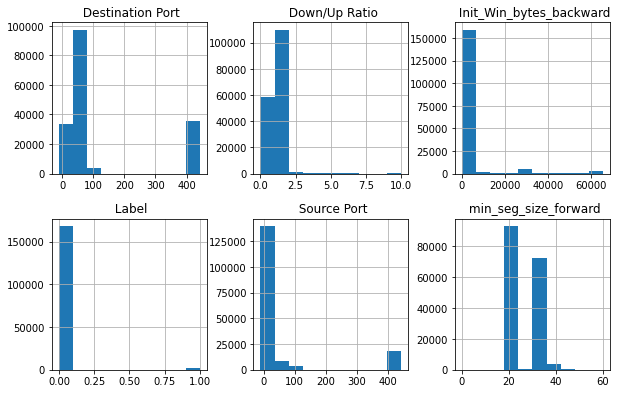

In [15]:
Dataset1.hist(layout=(3,3), figsize=(10,10))

# Problem 7   
**[10 pts] Attempt a few classifier models and report their 10-fold CV performance.**  

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [17]:
#logistic regression 
scaler1 = StandardScaler()
LR =LogisticRegression(solver='lbfgs')
f1scores_LG = cross_val_score(LR, scaler1.fit_transform(Dataset1.iloc[:,[0,1,2,3,4]],Dataset1.iloc[:,5]),Dataset1.iloc[:,5], cv=10, scoring='f1_weighted')
f1scores_LG

array([0.98017224, 0.97890701, 0.98011347, 0.97987829, 0.97996649,
       0.98028978, 0.97993592, 0.97975948, 0.97996532, 0.97996532])

In [18]:
# random forest
RF= RandomForestClassifier(20)
f1scores_RF = cross_val_score(RF, scaler1.fit_transform(Dataset1.iloc[:,[0,1,2,3,4]],Dataset1.iloc[:,5]),Dataset1.iloc[:,5], cv=10, scoring='f1_weighted')
f1scores_RF

array([0.9972506 , 0.99710449, 0.99655762, 0.99620375, 0.9956353 ,
       0.99825861, 0.99520779, 0.9977219 , 0.99592264, 0.99561915])

In [19]:
#multi layer perceptron 
MLP= MLPClassifier(3)
f1scores_MLP = cross_val_score(MLP, scaler1.fit_transform(Dataset1.iloc[:,[0,1,2,3,4]],Dataset1.iloc[:,5]),Dataset1.iloc[:,5], cv=10, scoring='f1_weighted')
f1scores_MLP

C:\Users\physi\Anaconda4\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.99541078, 0.99509167, 0.99379799, 0.99420608, 0.99392564,
       0.99615428, 0.99216541, 0.99736931, 0.99500879, 0.98084655])

# Problem 8 
**[10 pts] Convert your code to be used for the remaining 7 datasets, i.e. Datasets 2-8.** 


In [20]:
dataset2= pd.read_csv("C:/Users/physi/Desktop/AppliedMachineLearning_EN.705.601/Mod10/GeneratedLabelledFlows/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",encoding='cp1252',low_memory=False )
dataset3= pd.read_csv("C:/Users/physi/Desktop/AppliedMachineLearning_EN.705.601/Mod10/GeneratedLabelledFlows/Tuesday-WorkingHours.pcap_ISCX.csv",encoding='cp1252',low_memory=False )
dataset4= pd.read_csv("C:/Users/physi/Desktop/AppliedMachineLearning_EN.705.601/Mod10/GeneratedLabelledFlows/Wednesday-workingHours.pcap_ISCX.csv",encoding='cp1252',low_memory=False )
dataset5= pd.read_csv("C:/Users/physi/Desktop/AppliedMachineLearning_EN.705.601/Mod10/GeneratedLabelledFlows/Friday-WorkingHours-Morning.pcap_ISCX.csv",encoding='cp1252',low_memory=False )
dataset6= pd.read_csv("C:/Users/physi/Desktop/AppliedMachineLearning_EN.705.601/Mod10/GeneratedLabelledFlows/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",encoding='cp1252',low_memory=False )
dataset7= pd.read_csv("C:/Users/physi/Desktop/AppliedMachineLearning_EN.705.601/Mod10/GeneratedLabelledFlows/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",encoding='cp1252',low_memory=False )
dataset8= pd.read_csv("C:/Users/physi/Desktop/AppliedMachineLearning_EN.705.601/Mod10/GeneratedLabelledFlows/Monday-WorkingHours.pcap_ISCX.csv",encoding='cp1252',low_memory=False )

In [21]:
#choose features based on correlation

dataset2= dataset2.drop(dataset2.columns.difference([' act_data_pkt_fwd',' Subflow Fwd Bytes','Total Length of Fwd Packets','Subflow Fwd Packets',' Total Fwd Packets', ' Label']), 1)

dataset3= dataset3.drop(dataset3.columns.difference([' Protocol', ' Min Packet Length' , ' Bwd Packet Length Min' ,  ' PSH Flag Count' ,  ' SYN Flag Count' , 'Fwd PSH Flags', ' Label']), 1)

dataset4= dataset4.drop(dataset4.columns.difference([' Protocol' , ' Bwd Packet Length Min' , ' Min Packet Length' ,' Destination Port' , ' Down/Up Ratio' , ' URG Flag Count' , ' Bwd Packet Length Mean' , ' Avg Bwd Segment Size' , ' Bwd Packet Length Std' , 'Bwd Packet Length Max' , ' Idle Max', ' Label']), 1)

dataset5= dataset5.drop(dataset5.columns.difference([' Protocol' , ' URG Flag Count' , ' PSH Flag Count', ' Label']), 1)

dataset6= dataset6.drop(dataset6.columns.difference([' Protocol' , ' Min Packet Length' , ' Bwd Packet Length Min' , ' Average Packet Size' , ' PSH Flag Count' , ' min_seg_size_forward' , ' Down/Up Ratio' , 'Init_Win_bytes_forward', ' Label']), 1)

dataset7= dataset7.drop(dataset7.columns.difference([' Destination Port' , ' Protocol' , ' URG Flag Count' , ' Min Packet Length' , ' min_seg_size_forward' , ' Bwd Packet Length Mean' , ' Avg Bwd Segment Size' , 'Bwd Packet Length Max' , ' Bwd Packet Length Std' , ' Packet Length Mean', ' Label']), 1)

In [22]:

dataset8 =dataset8.drop(['Flow ID'], axis =1)
dataset8 =dataset8.drop([' Source IP'], axis =1)
dataset8 =dataset8.drop([' Destination IP'], axis =1) 
dataset8 =dataset8.drop([' Timestamp'], axis =1) 
dataset8 =dataset8.drop(['Flow Bytes/s'], axis =1) 
dataset8 =dataset8.drop([' Flow Packets/s'], axis =1)

In [23]:
dataset2= dataset2.dropna(axis=0)
dataset3= dataset3.dropna(axis=0)
dataset4= dataset4.dropna(axis=0)
dataset5= dataset5.dropna(axis=0)
dataset6= dataset6.dropna(axis=0)
dataset7= dataset7.dropna(axis=0)
dataset8= dataset8.dropna(axis=0)

In [24]:


# for col in dataset8.columns:
#     if dataset8[col].dtype == np.object:
#         print(col, dataset8[col].unique())

In [25]:
# map the labels feature for clasification

attacks2 = {'BENIGN':0, 'Infiltration':1}
attacks3 = {'BENIGN':0, 'FTP-Patator':1, 'SSH-Patator':1}
attacks4 = {'BENIGN':0, 'DoS slowloris':1, 'DoS Slowhttptest':1, 'DoS Hulk':1, 'DoS GoldenEye':1,
 'Heartbleed':1}
attacks5 = {'BENIGN':0, 'Bot':1}
attacks6 = {'BENIGN':0, 'PortScan':1}
attacks7 = {'BENIGN':0, 'DDoS':1}
attacks8 = {'BENIGN':0}
dataset2[' Label'] = dataset2[' Label'].map(attacks2)
dataset3[' Label'] = dataset3[' Label'].map(attacks3)
dataset4[' Label'] = dataset4[' Label'].map(attacks4)
dataset5[' Label'] = dataset5[' Label'].map(attacks5)
dataset6[' Label'] = dataset6[' Label'].map(attacks6)
dataset7[' Label'] = dataset7[' Label'].map(attacks7)
dataset8[' Label'] = dataset8[' Label'].map(attacks8)

In [26]:
#notes on features to be used

# ' act_data_pkt_fwd' ' Subflow Fwd Bytes'' Total Length of Fwd Packets' ' Subflow Fwd Packets' ' Total Fwd Packets'
# dataset2.corr().sort_values([' Label'])

In [28]:
#notes on features to be used

# Protocol, Min Packet Length , Bwd Packet Length Min ,  PSH Flag Count ,  SYN Flag Count , Fwd PSH Flags
# dataset3.corr().sort_values([' Label'])

In [32]:
#notes on features to be used

# Protocol , Bwd Packet Length Min , Min Packet Length , Destination Port , Down/Up Ratio , URG Flag Count , Bwd Packet Length Mean , Avg Bwd Segment Size , Bwd Packet Length Std , Bwd Packet Length Max , Idle Max
# dataset4.corr().sort_values([' Label'])

In [35]:
#notes on features to be used

# Protocol , URG Flag Count , PSH Flag Count
# dataset5.corr().sort_values([' Label'])

In [38]:
#notes on features to be used

# Protocol , Min Packet Length , Bwd Packet Length Min , Average Packet Size , PSH Flag Count , min_seg_size_forward , Down/Up Ratio , Init_Win_bytes_forward
# dataset6.corr().sort_values([' Label'])

In [41]:
#notes on features to be used

# Destination Port , Protocol , URG Flag Count , Min Packet Length , min_seg_size_forward , Bwd Packet Length Mean , Avg Bwd Segment Size , Bwd Packet Length Max , Bwd Packet Length Std , Packet Length Mean
# dataset7.corr().sort_values([' Label'])

In [44]:
# dataset8.corr().sort_values([' Label'])

# Problem 9  
**[10 pts] Pick a classifier and report it's evaluation for the remaining 7 datasets. Note that one dataset has a single class, which might need an unsupervised learning.**  

In [60]:
# random forest for dataset2 #### for some reason my cross val wouln't run so I used test train split here
scaler2 = StandardScaler()
RF2= RandomForestClassifier(20)
# f1scores_RF2 = cross_val_score(RF2, scaler2.fit_transform(dataset2.iloc[:,[0,1,2,3,4]],dataset2.iloc[:,5]),dataset2.iloc[:,5], cv=10, scoring='f1_weighted')
# f1scores_RF2

X_train, X_test, Y_train, Y_test = train_test_split(dataset2.iloc[:,[0,1,2,3,4]], dataset2.iloc[:,5], test_size=0.2, random_state=10)
pipe_l2 = make_pipeline(StandardScaler(),
                            RandomForestClassifier(20,
                                                   random_state=10))
pipe_l2.fit(X_train, Y_train)
Y_pred2 = pipe_l2.predict(X_test)
f1_score(Y_test, Y_pred2,average='weighted')

0.9999324342783787

In [61]:
# random forest for dataset3 #### for some reason my cross val wouln't run so I used test train split here
scaler3 = StandardScaler()
RF3= RandomForestClassifier(20)
# f1scores_RF3 = cross_val_score(RF3, scaler3.fit_transform(dataset3.iloc[:,[0,1,2,3,4,5]],dataset3.iloc[:,6]),dataset3.iloc[:,6], cv=10, scoring='f1_weighted')
# f1scores_RF3

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(dataset3.iloc[:,[0,1,2,3,4,5]], dataset3.iloc[:,6], test_size=0.2, random_state=10)
pipe_l3 = make_pipeline(StandardScaler(),
                            RandomForestClassifier(20,
                                                   random_state=10))
pipe_l3.fit(X_train3, Y_train3)
Y_pred3 = pipe_l3.predict(X_test3)
f1_score(Y_test3, Y_pred3,average='weighted')

C:\Users\physi\Anaconda4\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9544703683562507

In [50]:
# random forest for dataset4
scaler4 = StandardScaler()
RF4= RandomForestClassifier(20)
f1scores_RF4 = cross_val_score(RF4, scaler4.fit_transform(dataset4.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]],dataset4.iloc[:,11]),dataset4.iloc[:,11], cv=10, scoring='f1_weighted')
f1scores_RF4

array([0.95336686, 0.96703057, 0.97689987, 0.97738506, 0.96741474,
       0.9760152 , 0.9949402 , 0.9997113 , 0.99955248, 0.94809413])

In [63]:
# random forest for dataset5 #### for some reason my cross val wouln't run so I used test train split here
scaler5 = StandardScaler()
RF5= RandomForestClassifier(20)
# f1scores_RF5 = cross_val_score(RF5, scaler5.fit_transform(dataset5.iloc[:,[0,1,2]],dataset5.iloc[:,3]),dataset5.iloc[:,3], cv=10, scoring='f1_weighted')
# f1scores_RF5

X_train5, X_test5, Y_train5, Y_test5 = train_test_split(dataset5.iloc[:,[0,1,2]], dataset5.iloc[:,3], test_size=0.2, random_state=10)
pipe_l5 = make_pipeline(StandardScaler(),
                            RandomForestClassifier(20,
                                                   random_state=10))
pipe_l5.fit(X_train5, Y_train5)
Y_pred5 = pipe_l5.predict(X_test5)
f1_score(Y_test5, Y_pred5,average='weighted')


C:\Users\physi\Anaconda4\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9850278645867069

In [52]:
# random forest for dataset6
scaler6 = StandardScaler()
RF6= RandomForestClassifier(20)
f1scores_RF6 = cross_val_score(RF6, scaler6.fit_transform(dataset6.iloc[:,[0,1,2,3,4,5,6,7]],dataset6.iloc[:,8]),dataset6.iloc[:,8], cv=10, scoring='f1_weighted')
f1scores_RF6

array([0.9970338 , 0.99975564, 0.99940653, 0.99909248, 0.9970686 ,
       0.99609109, 0.99664968, 0.9971034 , 0.99776634, 0.99930182])

In [53]:
# random forest for dataset7
scaler7 = StandardScaler()
RF7= RandomForestClassifier(20)
f1scores_RF7 = cross_val_score(RF7, scaler7.fit_transform(dataset7.iloc[:,[0,1,2,3,4,5,6,7,8,9]],dataset7.iloc[:,10]),dataset7.iloc[:,10], cv=10, scoring='f1_weighted')
f1scores_RF7

array([0.99237265, 0.99476916, 0.998405  , 0.99929119, 0.97272574,
       0.9976073 , 0.99525706, 0.99179519, 0.98788438, 0.98610899])